In [1]:
# Importing essential libraries for data manipulation, visualization, and machine learning
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import seaborn as sns  # Enhanced data visualization
import matplotlib.pyplot as plt  # Plotting graphs

# Machine Learning Algorithms
from sklearn.model_selection import train_test_split  # Splitting data for training and testing
from sklearn.linear_model import LogisticRegression  # Logistic Regression algorithm
from sklearn.ensemble import RandomForestClassifier  # Random Forest algorithm

# Feature Engineering
from sklearn.decomposition import PCA  # Principal Component Analysis for feature reduction

In [2]:
# Reading data from the CSV file
df=pd.read_csv('/content/smallest_clean_sample2.csv')

In [3]:
# Retrieving the column names of the dataset
df.keys()

Index(['Unnamed: 0', 'period_begin', 'period_end', 'period_duration',
       'zipcode', 'state', 'city', 'median_sale_price',
       'median_sale_price_mom', 'median_sale_price_yoy', 'median_list_price',
       'median_list_price_mom', 'median_list_price_yoy', 'median_ppsf_mom',
       'median_ppsf_yoy', 'homes_sold', 'homes_sold_mom', 'inventory',
       'median_dom', 'population', 'population_proper',
       'labor_force_participation', 'unemployment_rate', 'home_ownership',
       'home_value', 'rent_median', 'median_list_ppsf', 'new_listings',
       'new_listings_mom', 'months_of_supply', 'avg_sale_to_list',
       'age_median', 'family_size', 'unemployment_rate.1', 'married', 'fips',
       'densityMi', 'pop2010', 'growth', 'growthSince2010',
       'QualityOfLifeQualityOfLife', 'QualityOfLifeAffordability',
       'QualityOfLifeEconomy', 'QualityOfLifeEducationAndHealth',
       'QualityOfLifeSafety', 'begin_year', 'ppsf_category',
       'quality_category', 'density_category', 

In [4]:
# Dropping columns related to components of a desirable category not processed in the preprocessed file
df= df.drop(columns=[ 'ppsf_category',
       'quality_category', 'density_category', 'sold_above_category',
       'education_category', 'income_category', 'growth_category'])

In [5]:
# Importing necessary modules for data splitting, modeling, metrics, and preprocessing
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import LogisticRegression  # Logistic Regression algorithm
from sklearn.metrics import classification_report, confusion_matrix  # Metrics for model evaluation
from sklearn.preprocessing import StandardScaler  # Standardization of data
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix  # Additional evaluation metrics


In [6]:
# Retrieving the column names of the dataset
df.keys()

Index(['Unnamed: 0', 'period_begin', 'period_end', 'period_duration',
       'zipcode', 'state', 'city', 'median_sale_price',
       'median_sale_price_mom', 'median_sale_price_yoy', 'median_list_price',
       'median_list_price_mom', 'median_list_price_yoy', 'median_ppsf_mom',
       'median_ppsf_yoy', 'homes_sold', 'homes_sold_mom', 'inventory',
       'median_dom', 'population', 'population_proper',
       'labor_force_participation', 'unemployment_rate', 'home_ownership',
       'home_value', 'rent_median', 'median_list_ppsf', 'new_listings',
       'new_listings_mom', 'months_of_supply', 'avg_sale_to_list',
       'age_median', 'family_size', 'unemployment_rate.1', 'married', 'fips',
       'densityMi', 'pop2010', 'growth', 'growthSince2010',
       'QualityOfLifeQualityOfLife', 'QualityOfLifeAffordability',
       'QualityOfLifeEconomy', 'QualityOfLifeEducationAndHealth',
       'QualityOfLifeSafety', 'begin_year', 'desirable'],
      dtype='object')

In [7]:
# Selecting features (X) and target variable (y)
X = df[['median_sale_price', 'population',
 'labor_force_participation', 'unemployment_rate', 'home_ownership',
'family_size', 'age_median', 'rent_median', 'avg_sale_to_list', 'married','QualityOfLifeQualityOfLife', 'QualityOfLifeAffordability',
 'QualityOfLifeEconomy', 'QualityOfLifeEducationAndHealth']]

y=df['desirable']

In [8]:
X.shape

(85000, 14)

In [9]:
y.shape

(85000,)

In [10]:
# Filling missing (NaN) values with the mean of each column
df.fillna(df.mean(), inplace=True)

<ipython-input-10-30c0a46e8857>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [11]:
na_count_per_column = df.isna().sum()
print(na_count_per_column)


Unnamed: 0                             0
period_begin                           0
period_end                             0
period_duration                        0
zipcode                                0
state                                  0
city                                 641
median_sale_price                      0
median_sale_price_mom                  0
median_sale_price_yoy                  0
median_list_price                      0
median_list_price_mom                  0
median_list_price_yoy                  0
median_ppsf_mom                        0
median_ppsf_yoy                        0
homes_sold                             0
homes_sold_mom                         0
inventory                              0
median_dom                             0
population                             0
population_proper                      0
labor_force_participation              0
unemployment_rate                      0
home_ownership                         0
home_value      

In [12]:
#i wanna drop the NA in city
df = df.dropna(subset=['city'])



In [14]:
#run again after dropping na
# Selecting features (X) and target variable (y)
X = df[['median_sale_price', 'population',
 'labor_force_participation', 'unemployment_rate', 'home_ownership',
'family_size', 'age_median', 'rent_median', 'avg_sale_to_list', 'married','QualityOfLifeQualityOfLife', 'QualityOfLifeAffordability',
 'QualityOfLifeEconomy', 'QualityOfLifeEducationAndHealth']]

y=df['desirable']

In [15]:
X.fillna(X.mean(), inplace=True)


<ipython-input-15-a786b3e72875>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [16]:
#making sure PCA no error
from sklearn.decomposition import PCA

# Checking if the feature matrix X is empty
print("Shape of X:", X.shape)
if X.shape[0] == 0:
    print("Error: DataFrame X is empty")
else:
    # Proceeding with PCA if X is not empty
    pca = PCA(n_components=5)               # Initializing PCA with 5 components
    pca.fit(X)                              # Fitting PCA on the features
    pca2 = pca.transform(X)                 # Transforming the features using PCA
    print("PCA completed successfully")


Shape of X: (84359, 14)
PCA completed successfully


In [17]:
# Group by city and sum desirability scores
city_desirability = df.groupby('city')['desirable'].sum()

# Sort the cities by desirability score in descending order and select top 20
top_20_cities=pd.DataFrame()
top_20_cities['original'] = city_desirability.sort_values(ascending=False).head(20)

# Print the top 20 cities
top_20_cities



,original
city,
New York,2876
Boston,496
Hempstead,458
Tampa,355
Atlanta,350
Miami,299
St. Petersburg,284
Brookhaven,249
Oyster Bay,228


In [36]:
# select algorithms
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rforest=RandomForestClassifier()
gradboost=GradientBoostingClassifier()

from xgboost import XGBClassifier
xgb=XGBClassifier()
log = LogisticRegression()

# select evaluation metrics accuracy, balance accuracy, confusion matrix
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
# split data
from sklearn.model_selection import train_test_split

#mlp classifier
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(activation = 'relu', hidden_layer_sizes=(25,5))
algos = [dtree, rforest, gradboost, xgb, log, mlp]

In [46]:

# Save only the balanced_accuracies as a list called x_features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

x_features = [] # creating empty list..

for algo in algos:
  algo.fit(X_train, y_train)
  y_test_pred = algo.predict(X_test)
  print(type(algo).__name__)
  print(accuracy_score(y_test, y_test_pred))
  balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
  print("Balanced Accuracy:", balanced_accuracy)
  print(confusion_matrix(y_test, y_test_pred))
  x_features.append(balanced_accuracy)
  print()



DecisionTreeClassifier
0.9158368895211001
Balanced Accuracy: 0.9101596451568625
[[14868  1086]
 [ 1044  8310]]

RandomForestClassifier
0.944049312470365
Balanced Accuracy: 0.938197397697984
[[15326   628]
 [  788  8566]]

GradientBoostingClassifier
0.8897976924292714
Balanced Accuracy: 0.8759291566525087
[[14823  1131]
 [ 1658  7696]]

XGBClassifier
0.9424292713766398
Balanced Accuracy: 0.9358731441090697
[[15332   622]
 [  835  8519]]

LogisticRegression
0.6523233760075865
Balanced Accuracy: 0.6375777240580138
[[11074  4880]
 [ 3919  5435]]

MLPClassifier
0.698316737790422
Balanced Accuracy: 0.6194828050787129
[[14706  1248]
 [ 6387  2967]]



In [ ]:
# Selecting features (X) and target variable (y)
#X = df[['median_sale_price', 'population',
     #   'labor_force_participation', 'unemployment_rate', 'home_ownership',
     #   'family_size', 'age_median', 'rent_median', 'avg_sale_to_list', 'married','QualityOfLifeQualityOfLife', 'QualityOfLifeAffordability',
     #  'QualityOfLifeEconomy', 'QualityOfLifeEducationAndHealth']]

#y=df['desirable']

In [19]:
# First, ensure that X and y have the same number of rows
print(X.shape)  # Should show (number of samples, number of features)
print(y.shape)  # Should show (number of samples,)


(84359, 14)
(84359,)


In [45]:
# Create a DataFrame with city information and features
df_with_cities = df[['city'] + X.columns.tolist()]


# Split the data
X_train, X_test, y_train, y_test, df_train, df_test = train_test_split(X, y, df_with_cities, test_size=0.3, stratify=y)

# Train the XGBoost model
xgb.fit(X_train, y_train)

# Predict desirability on the test set
y_test_pred = xgb.predict(X_test)

# Add predictions to the test DataFrame
df_test['predicted_desirability'] = y_test_pred

# Group by city, sum predicted desirability, and find the top 20 cities
top_20_xgb=pd.DataFrame()
top_20_xgb['xgb'] = df_test.groupby('city')['predicted_desirability'].sum().sort_values(ascending=False).head(20)

top_20_xgb


,xgb
city,
New York,848
Boston,150
Hempstead,128
Atlanta,123
Tampa,108
Miami,101
St. Petersburg,75
Brookhaven,70
Fort Lauderdale,66


In [ ]:
#Visualization ideas: top 20 countries, then compare the population per each city as visualization

In [23]:
# Initializing PCA with 5 components and fitting it to the data for dimensionality reduction
pca = PCA(n_components=5)
pca.fit(X)                                 # Fitting PCA to the feature matrix X
pca2 = pca.transform(X)                    # Transforming the data to a lower-dimensional space using PCA
pca2                                       # Resulting reduced data


array([[ 1.09108592e+07,  3.27580191e+05, -2.37211472e+02,
        -1.78048091e+01,  1.49625725e+01],
       [ 1.09186189e+07, -2.15005417e+05, -5.89245878e+01,
        -3.17025577e+01,  1.85209358e+01],
       [-7.81114880e+06, -2.00753227e+05,  5.63209990e+02,
        -4.23303272e+01, -8.43889815e+00],
       ...,
       [-9.01360674e+06, -2.12033867e+05, -1.34101504e+02,
         2.54101822e+01,  2.09448323e+00],
       [ 5.31499570e+06, -9.29010529e+04, -2.41819845e+02,
        -1.47971041e+01, -1.82280819e+00],
       [-1.03647009e+07, -5.69902226e+04,  9.76073167e+01,
         1.93627581e+01,  2.48982384e+00]])

In [24]:
# Creating a new DataFrame 'df_pca' from the PCA-transformed data 'pca2' with named columns
df_pca = pd.DataFrame(pca2, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5'])
df_pca  # Displaying the new DataFrame with PCA components


,pca_1,pca_2,pca_3,pca_4,pca_5
0,1.091086e+07,327580.190666,-237.211472,-17.804809,14.962573
1,1.091862e+07,-215005.417287,-58.924588,-31.702558,18.520936
2,-7.811149e+06,-200753.227289,563.209990,-42.330327,-8.438898
3,-1.036454e+07,-143490.023739,-95.380559,13.687967,7.085512
4,-7.737903e+06,-322617.556912,568.280931,-19.900760,-15.572176
...,...,...,...,...,...
84354,3.073560e+06,-256809.770019,99.832584,-13.156051,-24.257032
84355,6.131737e+06,216614.280305,-466.063011,-6.918958,2.594920
84356,-9.013607e+06,-212033.867090,-134.101504,25.410182,2.094483
84357,5.314996e+06,-92901.052935,-241.819845,-14.797104,-1.822808


In [47]:
##PCA
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.3, stratify=y)
pca_features= []

for algo in algos:
  algo.fit(X_train, y_train)
  y_test_pred = algo.predict(X_test)
  print(type(algo).__name__)
  print(accuracy_score(y_test, y_test_pred))
  balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
  print("Balanced Accuracy:", balanced_accuracy)
  print(confusion_matrix(y_test, y_test_pred))
  pca_features.append(balanced_accuracy)
  print()



DecisionTreeClassifier
0.8854117275169907
Balanced Accuracy: 0.8762538352928235
[[14540  1414]
 [ 1486  7868]]

RandomForestClassifier
0.911688003793267
Balanced Accuracy: 0.9029549394856589
[[14940  1014]
 [ 1221  8133]]

GradientBoostingClassifier
0.8592144776355303
Balanced Accuracy: 0.8409692418300433
[[14533  1421]
 [ 2142  7212]]

XGBClassifier
0.9042595226805753
Balanced Accuracy: 0.894011410933438
[[14890  1064]
 [ 1359  7995]]

LogisticRegression
0.7858384700489963
Balanced Accuracy: 0.7579378107826518
[[13799  2155]
 [ 3265  6089]]

MLPClassifier
0.6242690058479532
Balanced Accuracy: 0.6952425080670108
[[6750 9204]
 [ 305 9049]]



In [48]:
#To put it in DF. Rerunning the code has caused the number to change
algorithm_names = ['Decision Tree','Rforest','Gradboost','XGB','Logistic Regression','MLP Classifier']
data = {
    'Algorithm': algorithm_names,
    'Balanced Accuracy (x_features)': x_features,
    'Balanced Accuracy (pca_features)': pca_features
}

accuracy_df= pd.DataFrame(data)
accuracy_df

,Algorithm,Balanced Accuracy (x_features),Balanced Accuracy (pca_features)
0,Decision Tree,0.910160,0.876254
1,Rforest,0.938197,0.902955
2,Gradboost,0.875929,0.840969
3,XGB,0.935873,0.894011
4,Logistic Regression,0.637578,0.757938
5,MLP Classifier,0.619483,0.695243


In [44]:
pca_features

[]

In [ ]:
#PCA visualization, feature importance
#import seaborn as sns
#import matplotlib.pyplot as plt
#plt.figure(figsize=(20,5))
#df_pca_components= pd.DataFrame(pca.components_,columns=X.keys())
#sns.heatmap(df_pca_components,cmap='Greys')

In [27]:
#TEST CPA
X_train, X_test, y_train, y_test, df_train, df_test = train_test_split(df_pca, y, df_with_cities, test_size=0.3, stratify=y)

# Train the XGBoost model
rforest.fit(X_train, y_train)

# Predict desirability on the test set
y_test_pred = rforest.predict(X_test)

# Add predictions to the test DataFrame
df_test['predicted_desirability'] = y_test_pred

# Group by city, sum predicted desirability, and find the top 20 cities
top_20_PCA_forest=pd.DataFrame()
top_20_PCA_forest['rforest'] = df_test.groupby('city')['predicted_desirability'].sum().sort_values(ascending=False).head(20)

top_20_PCA_forest

,rforest
city,
New York,875
Boston,146
Hempstead,128
Tampa,115
Atlanta,100
Miami,97
St. Petersburg,78
Oyster Bay,73
Brookhaven,71


In [ ]:
#bar chart how rforest top 20 cities compare with population and median sale price

ValueError: ignored

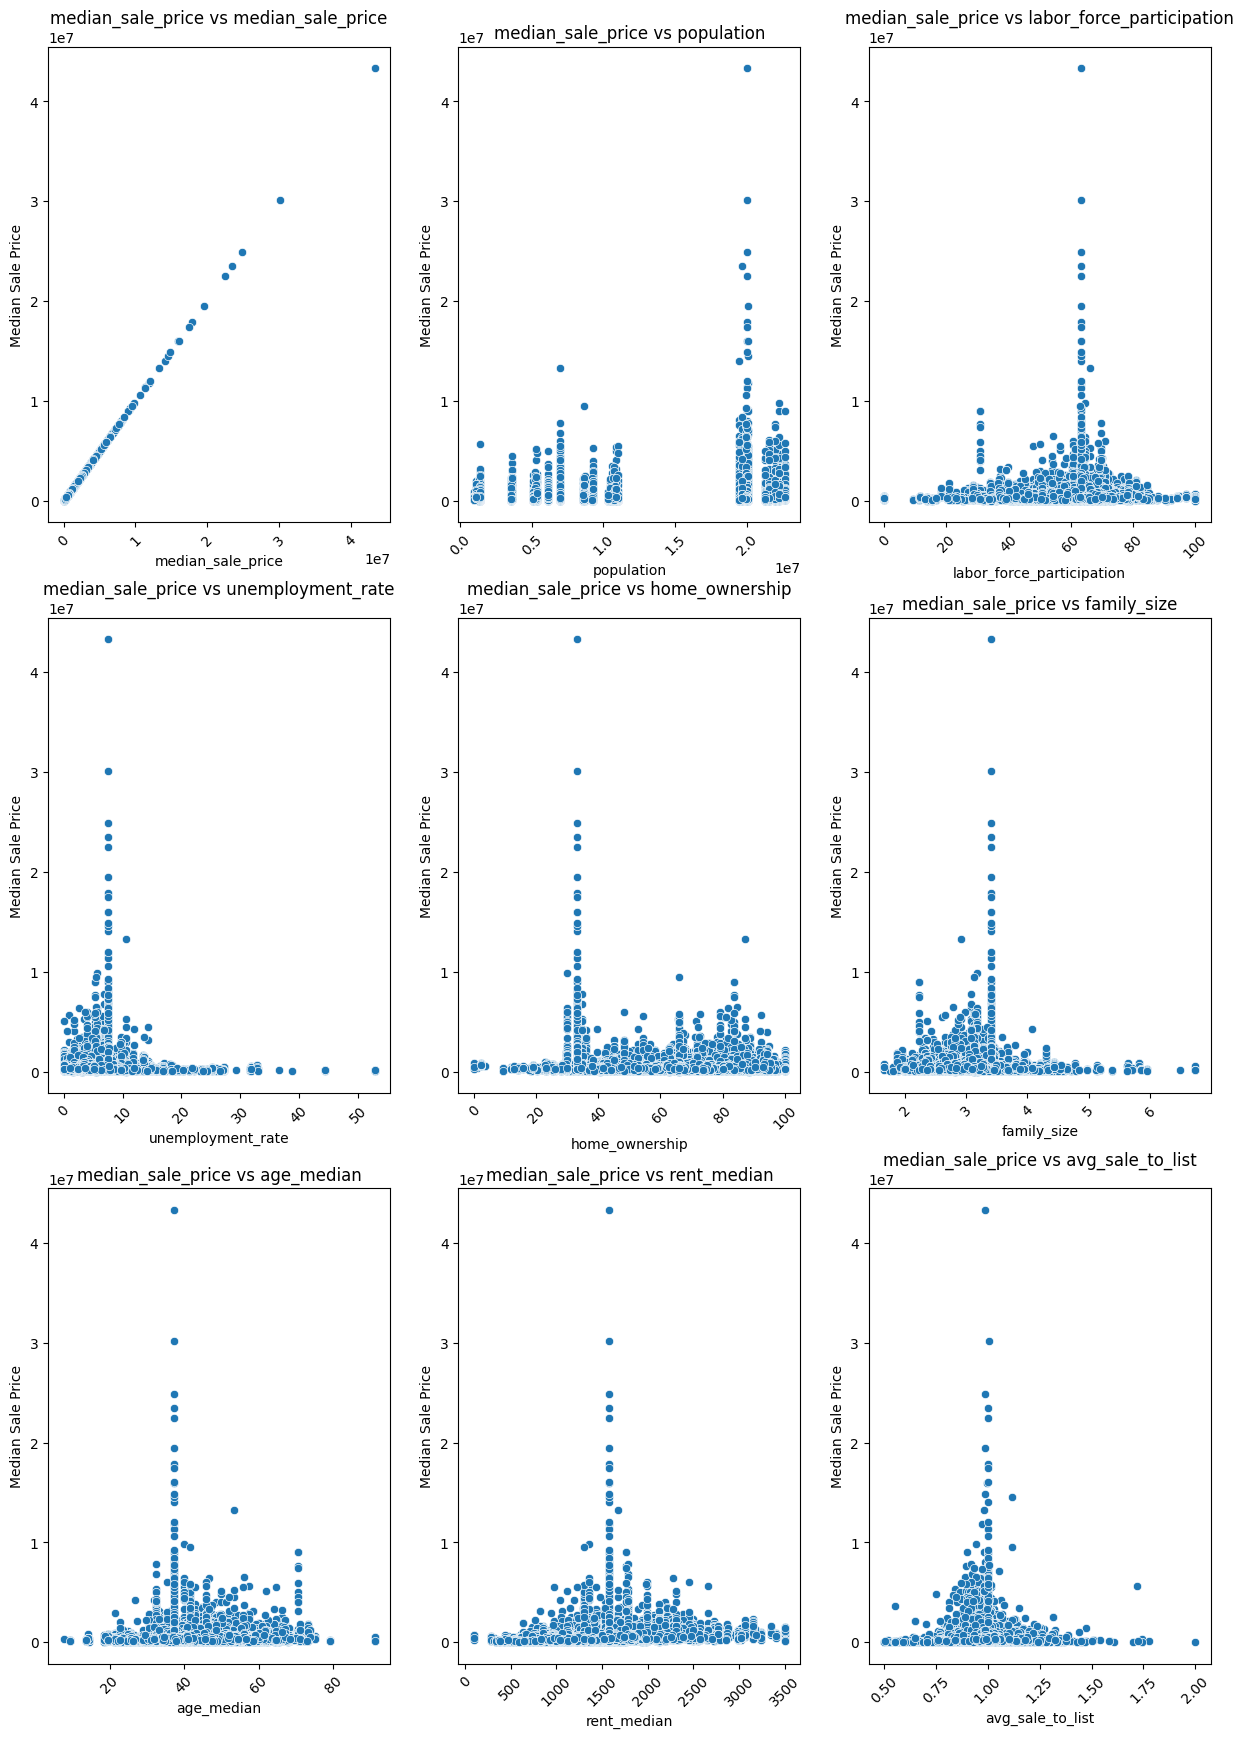

In [30]:
# Adjusting the code to provide more space between the plots and ensure the y-axis legend and title don't overlap

# Setting up the matplotlib figure
plt.figure(figsize=(15, 21))  # Increased figure size for more space

# Plotting scatter plots for each selected feature against median_sale_price
for i, feature in enumerate(X, 1):
    plt.subplot(3, 3, i)  # Creating subplots
    sns.scatterplot(data=df, x=feature, y='median_sale_price')  # Scatter plot
    plt.title(f"median_sale_price vs {feature}")  # Setting title
    plt.xlabel(feature)  # Labeling x-axis
    plt.ylabel('Median Sale Price')  # Labeling y-axis

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

# Adjusting layout with increased bottom margin and space between subplots for better visualization
plt.tight_layout()
plt.subplots_adjust(bottom=0.25, hspace=0.4)

plt.show()  # Displaying the plot


In [ ]:
# Installing SHAP library
!pip install shap

# Importing necessary libraries
import shap  # Importing SHAP library for interpreting model predictions

In [ ]:
# Features and target
#X_2 = df[features]
#y_2 = df['desirable']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_2, test_size=0.3, random_state=42)



# Training the model
rforest.fit(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, stratify=y)
rforest.fit(X_train, y_train)
y_test_pred = log_reg.predict(X_test)
print(type(rforest).__name__)
print(balanced_accuracy_score(y_test, y_test_pred))
print()

In [ ]:
explainer = shap.Explainer(rforest.predict, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.summary_plot(shap_values,X_test)

In [ ]:
####RFE PCA

In [ ]:
df.shape

(84359, 47)

In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(rforest, n_features_to_select=1)
selector = selector.fit(df_pca, y)

In [ ]:
# DataFrame displaying PCA column names and their ranks
df3 = pd.DataFrame()

df3['features'] = df_pca.keys()
df3['ranking'] = selector.ranking_
df3


,features,ranking
0,pca_1,3
1,pca_2,1
2,pca_3,2
3,pca_4,4
4,pca_5,5


<Axes: >

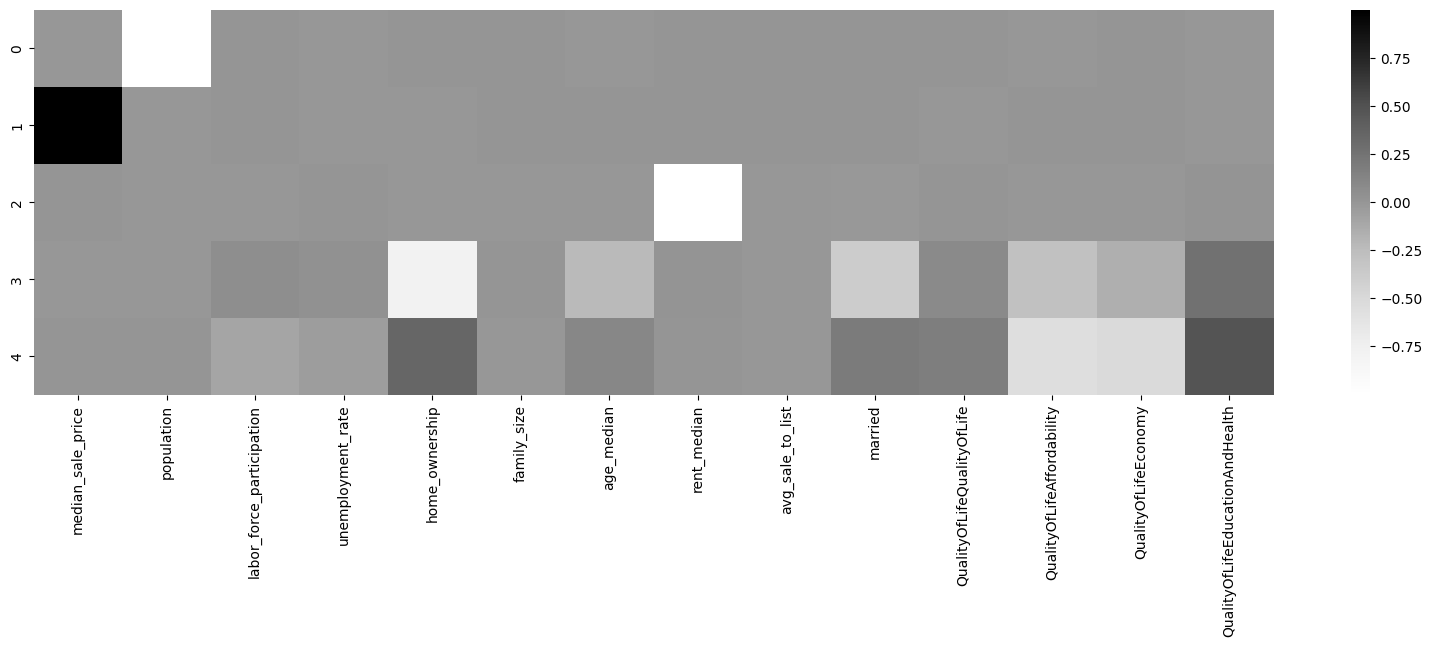

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
df_pca_components = pd.DataFrame(pca.components_, columns=X.keys())
sns.heatmap(df_pca_components, cmap='Greys')

In [ ]:
###Try to see the train df

X_train.head()

,pca_1,pca_2,pca_3,pca_4,pca_5
79127,1.093695e+07,-94971.268712,169.022513,-13.972018,5.383036
61310,-9.948091e+06,21282.947772,-389.032115,-0.591678,17.874113
63927,3.035555e+06,-248130.193765,-151.807357,-12.921087,-21.235727
50995,-7.380668e+06,157546.088678,372.608705,-18.062359,-14.069921
47833,1.939012e+06,-145364.450143,282.921762,-5.103246,21.686939


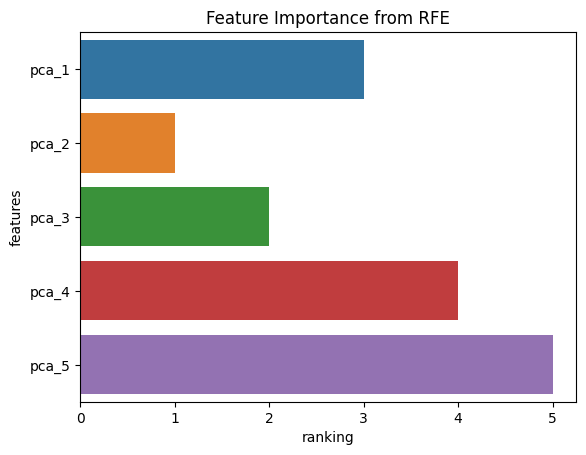

In [ ]:
#plot feature
sns.barplot(x='ranking', y='features', data=df3)
plt.title('Feature Importance from RFE')
plt.show()


In [ ]:
#top_20_rforest bar plot
existing_df =
joined_20= pd.merge(top_20_PCA_forest, df , left_on='city', right_on = 'city', how='left')

joined_20.keys()

joined_20.shape


(8295, 48)

In [ ]:
top_20_PCA_forest.shape

(20, 1)

In [ ]:
#cities=[]
#ities = top_20_PCA_forest.index
#cities

Index(['New York', 'Boston', 'Hempstead', 'Atlanta', 'Tampa', 'St. Petersburg',
       'Miami', 'Brookhaven', 'Oyster Bay', 'Richmond', 'Fort Lauderdale',
       'Orlando', 'Arlington', 'Newton', 'North Hempstead', 'Southampton',
       'Boca Raton', 'Virginia Beach', 'Greenburgh', 'Woodbridge'],
      dtype='object', name='city')